In [16]:
!pip install "numpy<1.24" --user

import numpy as np

In [17]:
import pandas as pd

In [18]:
import matplotlib.pyplot as plt
import geopandas as gpd

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 40)

In [53]:
# Collecte des données

data = pd.read_csv("Donnees-sur-le-parc-de-vehicule-au-niveau-regional.2023-05.csv", sep=';',header=[1])
zones = gpd.read_file('aires.geojson')

In [20]:
variables = ['PARC_2011','PARC_2012','PARC_2013','PARC_2014','PARC_2015','PARC_2016','PARC_2017','PARC_2018','PARC_2019','PARC_2020','PARC_2021','PARC_2022']
regions = data['REGION_LIBELLE'].unique()
regionsr = ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Corse', 'Grand Est', 'Guadeloupe',
       'Guyane', 'Hauts-de-France', 'La Réunion',
       'Martinique', 'Mayotte', 'Normandie', 'Nouvelle-Aquitaine',
       'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur",
       'Île-de-France']
regionsmet = ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Grand Est', 
        'Hauts-de-France', 'Normandie', 'Nouvelle-Aquitaine',
       'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur",
       'Île-de-France']
regionsmethorsb = ['Auvergne-Rhône-Alpes', 'Bretagne',
       'Centre-Val de Loire', 'Grand Est', 
        'Hauts-de-France', 'Normandie', 'Nouvelle-Aquitaine',
       'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur",
       'Île-de-France']
critair = data['CRITAIR'].unique()

In [138]:
# On créé le Data Frame avec le nombre de véhicules par années, sans distinction de région.

# On se focalise sur les véhicules particuliers et les camionnettes
df = data.loc[(data["CATEGORIE_VEHICULE"] == "Véhicule particulier") | (data["CATEGORIE_VEHICULE"] == "Dérivé VP") | (data["CATEGORIE_VEHICULE"] == "Camionnette")]

def age_num(age) :
    res = []
    for i in range (len(age)) :
        res.append(int(str(age[i])[0:2]))
    return res

# On créé une colonne avec l'âge du véhicule sous forme numérique
df.insert(loc = 1, column = 'AGE_NUM', value = age_num(np.array(df['AGE'], dtype = str)))

# On peut se séparer de certaines colonnes
df = df.drop(['REGION_CODE', 'REGION_LIBELLE', 'CLASSE_VEHICULE', 'STATUT_UTILISATEUR', 'AGE'], axis = 1)
df = df.sort_values(by = ['CATEGORIE_VEHICULE','CARBURANT','CRITAIR', 'AGE_NUM'])

# On effectue la somme pour les différentes régions et statuts d'utilisateurs
df = df.groupby(['CATEGORIE_VEHICULE','CARBURANT','CRITAIR', 'AGE_NUM'], as_index = False).sum()

def final_age(age) :
    res = []
    for i in range (len(age) - 1) :
        if age[i] < age[i+1] :
            res.append(0)
        else : 
            res.append(1)
    res.append(1)
    return res

# La colonne "FINAL_AGE", binaire, donne l'information sur la présence ou non de véhicules du même type
# mais plus agés dans le Data Frame, elle nous sert à connaître les frontières entre chaque type de 
# véhicule
df.insert(loc = 2, column = 'FINAL_AGE', value = final_age(np.array(df['AGE_NUM'], dtype = int)))

df = df.groupby(['CATEGORIE_VEHICULE','CARBURANT','CRITAIR', 'AGE_NUM']).sum()
df = df.sort_values(by = ['CATEGORIE_VEHICULE','CARBURANT','CRITAIR', 'AGE_NUM'])

df.head(10)

FINAL_AGE  PARC_2011   
CATEGORIE_VEHICULE CARBURANT CRITAIR    AGE_NUM                         
Camionnette        Diesel    Crit'Air 1 0                0          0  \
                                        1                0          4   
                                        2                0          0   
                                        3                1          0   
                             Crit'Air 2 0                0      12225   
                                        1                0        269   
                                        2                0         15   
                                        3                0          8   
                                        4                0          6   
                                        5                0          0   

                                                 PARC_2012  PARC_2013   
CATEGORIE_VEHICULE CARBURANT CRITAIR    AGE_NUM                         
Camionnette        Diesel    Crit'Air 1 0                0          0  \
                                        1                0          0   
                                        2                2          0   
                                        3                0          2   
                             Crit'Air 2 0           133674     240464   
                                        1            12001     132940   
                                        2              267      11792   
                                        3               15        259   
                                        4                8         11   
                                        5                6          7   

                                                 PARC_2014  PARC_2015   
CATEGORIE_VEHICULE CARBURANT CRITAIR    AGE_NUM                         
Camionnette        Diesel    Crit'Air 1 0                0          0  \
                                        1                0          0   
                                        2                0          0   
                                        3                0          0   
                             Crit'Air 2 0           252118     257630   
                                        1           238750     250556   
                                        2           128945     232600   
                                        3            11300     124073   
                                        4              241      10015   
                                        5               10        235   

                                                 PARC_2016  PARC_2017   
CATEGORIE_VEHICULE CARBURANT CRITAIR    AGE_NUM                         
Camionnette        Diesel    Crit'Air 1 0                0          0  \
                                        1                0          0   
                                        2                0          0   
                                        3                0          0   
                             Crit'Air 2 0           265445     291117   
                                        1           255705     264229   
                                        2           243305     248360   
                                        3           223733     234790   
                                        4           112610     203943   
                                        5             9637     108358   

                                                 PARC_2018  PARC_2019   
CATEGORIE_VEHICULE CARBURANT CRITAIR    AGE_NUM                         
Camionnette        Diesel    Crit'Air 1 0                0          0  \
                                        1                0          0   
                                        2                0          0   
                                        3                0          0   
                             Crit'Air 2 0           318619     334373   
                              

In [171]:
# On détermine nos Data Frame sur les probabilités de panne

# df2 nous servira pour le nombre absolu de pannes, df3 pour les proportions
df2 = df - df.shift(periods = - 1, axis = 0).shift(periods = -1, axis = 1)
df3 = df2/df

# On enlève toutes les lignes qui sont à la frontières entre deux types de véhicules
index = df.loc[df['FINAL_AGE'] == 1].index.tolist()

df2 = df2.drop(index)
df2 = df2.drop(['FINAL_AGE', 'PARC_2022'], axis = 1)

df3 = df3.drop(index)
df3 = df3.drop(['FINAL_AGE', 'PARC_2022'], axis = 1)

# On enlève toutes les lignes avec des valeurs négatives ou nulles, pour que ces exceptions ne soient pas 
# comptées dans les moyennes
df2 = (df2 + abs(df2))/2
df3 = (df3 + abs(df3))/2

df2.replace(0, np.nan, inplace = True)
df3.replace(0, np.nan, inplace = True)

# On prend les moyennes
pannes = df2.mean(axis = 1, skipna = True)
pannes_prop = df3.mean(axis = 1, skipna = True)

# On remplace les NaN utilisés en 0 pour que le Data Frame soit plus propre
df2.replace(np.nan, 0, inplace = True)
df3.replace(np.nan, 0, inplace = True)

print(pannes)
print(pannes_prop)


CATEGORIE_VEHICULE    CARBURANT             CRITAIR     AGE_NUM
Camionnette           Diesel                Crit'Air 1  0             1.5
                                                        1             2.0
                                                        2             NaN
                                            Crit'Air 2  0          1198.2
                                                        1          5119.0
                                                                    ...  
Véhicule particulier  Hybride rechargeable  Non classé  20            1.0
                                                        21            NaN
                                                        22            1.0
                                                        23            1.0
                                                        24            1.0
Length: 1427, dtype: float64
CATEGORIE_VEHICULE    CARBURANT             CRITAIR     AGE_NUM
Camionnette           Diesel 

In [184]:
print(pannes_prop.index.to_list())

[('Camionnette', 'Diesel', "Crit'Air 1", 0), ('Camionnette', 'Diesel', "Crit'Air 1", 1), ('Camionnette', 'Diesel', "Crit'Air 1", 2), ('Camionnette', 'Diesel', "Crit'Air 2", 0), ('Camionnette', 'Diesel', "Crit'Air 2", 1), ('Camionnette', 'Diesel', "Crit'Air 2", 2), ('Camionnette', 'Diesel', "Crit'Air 2", 3), ('Camionnette', 'Diesel', "Crit'Air 2", 4), ('Camionnette', 'Diesel', "Crit'Air 2", 5), ('Camionnette', 'Diesel', "Crit'Air 2", 6), ('Camionnette', 'Diesel', "Crit'Air 2", 7), ('Camionnette', 'Diesel', "Crit'Air 2", 8), ('Camionnette', 'Diesel', "Crit'Air 2", 9), ('Camionnette', 'Diesel', "Crit'Air 2", 10), ('Camionnette', 'Diesel', "Crit'Air 2", 11), ('Camionnette', 'Diesel', "Crit'Air 2", 12), ('Camionnette', 'Diesel', "Crit'Air 2", 13), ('Camionnette', 'Diesel', "Crit'Air 2", 14), ('Camionnette', 'Diesel', "Crit'Air 2", 15), ('Camionnette', 'Diesel', "Crit'Air 2", 16), ('Camionnette', 'Diesel', "Crit'Air 2", 17), ('Camionnette', 'Diesel', "Crit'Air 2", 18), ('Camionnette', 'Diese

In [212]:
print(pannes_prop.loc[("Camionnette", "Diesel", "Crit'Air 2")])

                0
AGE_NUM          
0        0.006377
1        0.021943
2        0.031871
3        0.111091
4        0.062591
5        0.025624
6        0.036659
7        0.087440
8        0.145381
9        0.039331
10       0.121045
11       0.059361
12       0.500000
13       0.625000
14            NaN
15       1.000000
16            NaN
17       1.000000
18            NaN
19            NaN
20       1.000000
21            NaN


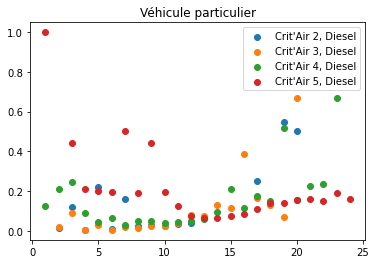

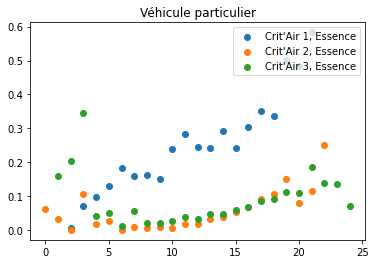

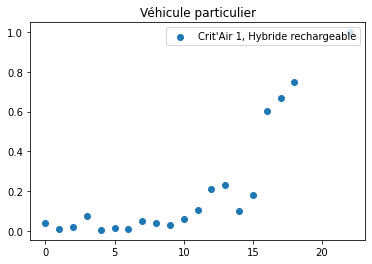

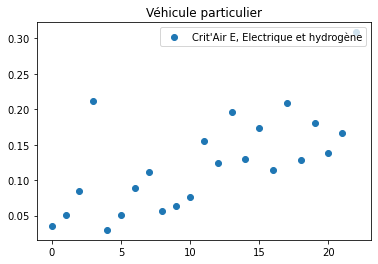

In [215]:
pannes_prop = pd.DataFrame(pannes_prop)

vhc = 'Véhicule particulier'

for i in ["Crit'Air 2", "Crit'Air 3", "Crit'Air 4", "Crit'Air 5"] :
    for j in ["Diesel"] :
        y = pannes_prop.loc[(vhc, j, i)]
        if np.nan not in y :
            x = np.arange(0, len(y), 1)
            labl = i + ", " + j
            plt.scatter(x, y, label = labl)
plt.title(vhc)
plt.legend(loc="upper right")
plt.show()

for i in ["Crit'Air 1", "Crit'Air 2", "Crit'Air 3"] :
    for j in ["Essence"] :
        y = pannes_prop.loc[(vhc, j, i)]
        if True :
            x = np.arange(0, len(y), 1)
            labl = i + ", " + j
            plt.scatter(x, y, label = labl)
plt.title(vhc)
plt.legend(loc="upper right")
plt.show()

y = pannes_prop.loc[(vhc, 'Hybride rechargeable', "Crit'Air 1")]
if np.nan not in y :
    x = np.arange(0, len(y), 1)
    labl = "Crit'Air 1, Hybride rechargeable"
    plt.scatter(x, y, label = labl)
    plt.legend(loc="upper right")
    plt.title(vhc)
    plt.show()

y = pannes_prop.loc[(vhc, 'Electrique et hydrogène', "Crit'Air E")]
if np.nan not in y :
    x = np.arange(0, len(y), 1)
    labl = "Crit'Air E, Electrique et hydrogène"
    plt.scatter(x, y, label = labl)
    plt.legend(loc="upper right")
    plt.title(vhc)
    plt.show()

Voici les graphes de pannes (en proportion de véhicules) pour chaque type possibles en réalité (c'est à dire la norme est vraisemblable). Ces graphes sont uniquement pour les véhicules particuliers, juste en dessous vous avez les camionnettes. 

Clairement, on voit que pour le diesel il n'y a pas tant de différences entre chaque Crit'Air, pour l'essence il y a un certain décrochage des Crit'Air 1 qui semblent beaucoup sortir du marché.

C'est flagrant sur le graphe de l'hybride rechargeable, il faut considérer une régression linéaire à partir d'un certain nombre d'année (et c'est assez logique en plus). On pourrait facilement se dire que l'on considère que les véhicules ne tombent en panne qu'après au moins 10 ans par exemple.

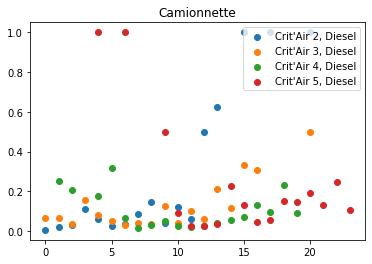

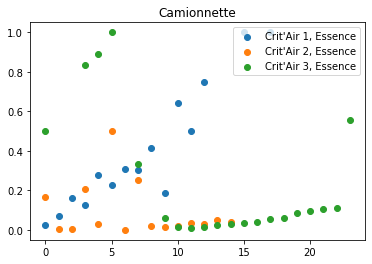

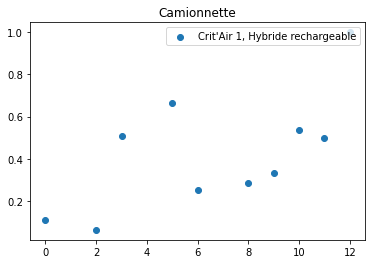

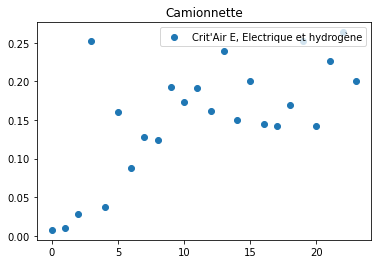

In [216]:
pannes_prop = pd.DataFrame(pannes_prop)

vhc = 'Camionnette'

for i in ["Crit'Air 2", "Crit'Air 3", "Crit'Air 4", "Crit'Air 5"] :
    for j in ["Diesel"] :
        y = pannes_prop.loc[(vhc, j, i)]
        if np.nan not in y :
            x = np.arange(0, len(y), 1)
            labl = i + ", " + j
            plt.scatter(x, y, label = labl)
plt.title(vhc)
plt.legend(loc="upper right")
plt.show()

for i in ["Crit'Air 1", "Crit'Air 2", "Crit'Air 3"] :
    for j in ["Essence"] :
        y = pannes_prop.loc[(vhc, j, i)]
        if np.nan not in y :
            x = np.arange(0, len(y), 1)
            labl = i + ", " + j
            plt.scatter(x, y, label = labl)
plt.title(vhc)
plt.legend(loc="upper right")
plt.show()

y = pannes_prop.loc[(vhc, 'Hybride rechargeable', "Crit'Air 1")]
if np.nan not in y :
    x = np.arange(0, len(y), 1)
    labl = "Crit'Air 1, Hybride rechargeable"
    plt.scatter(x, y, label = labl)
    plt.legend(loc="upper right")
    plt.title(vhc)
    plt.show()

y = pannes_prop.loc[(vhc, 'Electrique et hydrogène', "Crit'Air E")]
if np.nan not in y :
    x = np.arange(0, len(y), 1)
    labl = "Crit'Air E, Electrique et hydrogène"
    plt.scatter(x, y, label = labl)
    plt.legend(loc="upper right")
    plt.title(vhc)
    plt.show()

Je doute du fait que la prise en compte des camionnettes soit intéressantes, on pourrait en parler.

In [218]:
possibles = []

for i in ["Crit'Air 2", "Crit'Air 3", "Crit'Air 4", "Crit'Air 5"] :
    possibles.append(("Diesel", i))
for i in ["Crit'Air 1", "Crit'Air 2", "Crit'Air 3"] :
    possibles.append(("Essence", i))
possibles.append(("Hybride rechargeable", "Crit'Air 1"))
possibles.append(('Electrique et hydrogène', "Crit'Air E"))

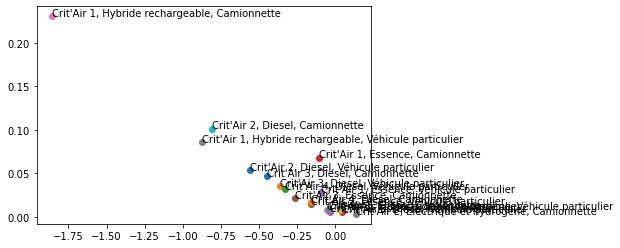

In [246]:
start = 10

for v in ["Véhicule particulier", "Camionnette"] :
    for p in possibles :
        l = (v, p[0], p[1])
        y = pannes_prop.loc[l]
        if len(y) > start + 1: 
            x = np.arange(0, len(y), 1)
            y = pd.DataFrame(y[0][start:])
            labl = p[1] + ", " + p[0] + ", " + v
            idx = y.loc[y[0] < np.inf].index
            fit = np.polyfit(x[idx], y.loc[idx], 1)
            r_squ = 
            plt.scatter(fit[1], fit[0])
            plt.annotate(labl, (fit[1], fit[0]))

plt.show()

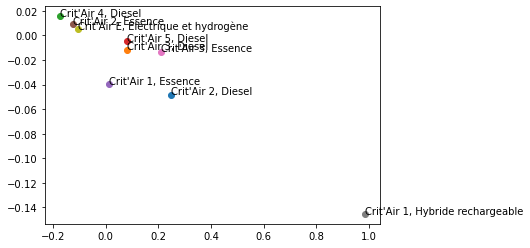

In [247]:
start = 10

for p in possibles :
    lvp = ("Véhicule particulier", p[0], p[1])
    lcm = ("Camionnette", p[0], p[1])
    yvp = pannes_prop.loc[lvp]
    ycm = pannes_prop.loc[lcm]
    if len(yvp) > start + 1 and len(ycm) > start + 1 : 
        xvp = np.arange(0, len(yvp), 1)
        xcm = np.arange(0, len(yvp), 1)
        yvp = pd.DataFrame(yvp[0][start:])
        ycm = pd.DataFrame(ycm[0][start:])
        labl = p[1] + ", " + p[0]
        idx_vp = yvp.loc[yvp[0] < np.inf].index
        idx_cm = ycm.loc[ycm[0] < np.inf].index
        fit_vp = np.polyfit(xvp[idx_vp], yvp.loc[idx_vp], 1)
        fit_cm = np.polyfit(xcm[idx_cm], ycm.loc[idx_cm], 1)
        delta = fit_vp - fit_cm
        plt.scatter(delta[1], delta[0])
        plt.annotate(labl, (delta[1], delta[0]))

plt.show()

Les camionnettes semblent plus tomber en panne que les véhicules particuliers, mais cela reste assez léger comme différence (on est sur du maximum 50% de différence).

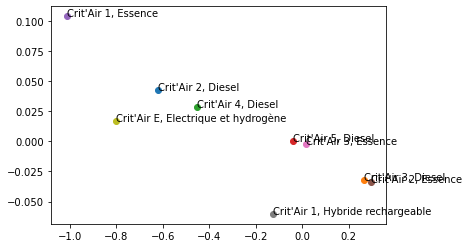

In [248]:
start = 10

for p in possibles :
    lvp = ("Véhicule particulier", p[0], p[1])
    lcm = ("Dérivé VP", p[0], p[1])
    yvp = pannes_prop.loc[lvp]
    ycm = pannes_prop.loc[lcm]
    if len(yvp) > start + 1 and len(ycm) > start + 1 : 
        xvp = np.arange(0, len(yvp), 1)
        xcm = np.arange(0, len(yvp), 1)
        yvp = pd.DataFrame(yvp[0][start:])
        ycm = pd.DataFrame(ycm[0][start:])
        labl = p[1] + ", " + p[0]
        idx_vp = yvp.loc[yvp[0] < np.inf].index
        idx_cm = ycm.loc[ycm[0] < np.inf].index
        fit_vp = np.polyfit(xvp[idx_vp], yvp.loc[idx_vp], 1)
        fit_cm = np.polyfit(xcm[idx_cm], ycm.loc[idx_cm], 1)
        delta = fit_vp - fit_cm
        plt.scatter(delta[1], delta[0])
        plt.annotate(labl, (delta[1], delta[0]))

plt.show()

Un peu plus différent par contre pour VP et dérivés VP.

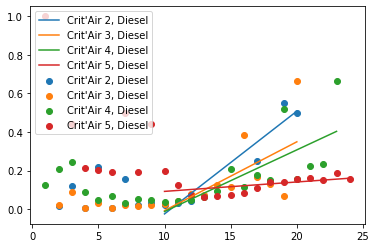

In [257]:
start = 10

for p in possibles[0:4] :
    l = ("Véhicule particulier", p[0], p[1])
    y = pannes_prop.loc[l]
    if len(y) > start + 1: 
        x = np.arange(0, len(y), 1)
        y_0 = pd.DataFrame(y[0][start:])
        idx = y_0.loc[y_0[0] < np.inf].index
        fit = np.polyfit(x[idx], y_0.loc[idx], 1)
        y_fit = fit[0]*x[idx] + fit[1]
        t = np.arange(0, len(y), 1)
        labl = p[1] + ", " + p[0]
        plt.scatter(t, y, label = labl)
        plt.plot(x[idx], y_fit, label = labl)

plt.legend(loc="upper left")
plt.show()

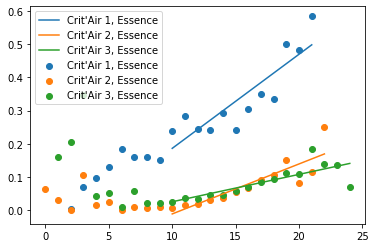

In [259]:
start = 10

for p in possibles[4:7] :
    l = ("Véhicule particulier", p[0], p[1])
    y = pannes_prop.loc[l]
    if len(y) > start + 1: 
        x = np.arange(0, len(y), 1)
        y_0 = pd.DataFrame(y[0][start:])
        idx = y_0.loc[y_0[0] < np.inf].index
        fit = np.polyfit(x[idx], y_0.loc[idx], 1)
        y_fit = fit[0]*x[idx] + fit[1]
        t = np.arange(0, len(y), 1)
        labl = p[1] + ", " + p[0]
        plt.scatter(t, y, label = labl)
        plt.plot(x[idx], y_fit, label = labl)

plt.legend(loc="upper left")
plt.show()

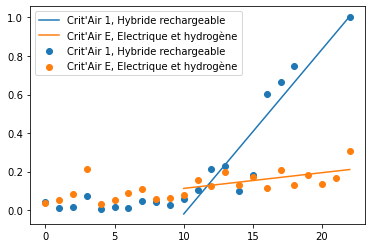

In [260]:
start = 10

for p in possibles[7:] :
    l = ("Véhicule particulier", p[0], p[1])
    y = pannes_prop.loc[l]
    if len(y) > start + 1: 
        x = np.arange(0, len(y), 1)
        y_0 = pd.DataFrame(y[0][start:])
        idx = y_0.loc[y_0[0] < np.inf].index
        fit = np.polyfit(x[idx], y_0.loc[idx], 1)
        y_fit = fit[0]*x[idx] + fit[1]
        t = np.arange(0, len(y), 1)
        labl = p[1] + ", " + p[0]
        plt.scatter(t, y, label = labl)
        plt.plot(x[idx], y_fit, label = labl)

plt.legend(loc="upper left")
plt.show()